<font size=5 > <p style="color:purple"> Yếu tố nào ảnh hưởng đến giá của dịch vụ bảo hiểm y tế

<font size='2'>Nhiều yếu tố ảnh hưởng đến số tiền bạn phải trả cho bảo hiểm y tế nằm ngoài tầm kiểm soát của bạn. Tuy nhiên, thật tốt khi hiểu được chúng là gì. Dưới đây là một số yếu tố ảnh hưởng đến chi phí bảo hiểm y tế

* **tuổi:** tuổi của người thụ hưởng chính

* **giới tính:** giới tính của người thụ hưởng bảo hiểm, nữ, nam

* **bmi:** Chỉ số khối cơ thể, cung cấp sự hiểu biết về cơ thể, cân nặng tương đối cao hay thấp so với chiều cao, chỉ số khách quan về trọng lượng cơ thể (kg / m ^ 2) sử dụng tỷ lệ giữa chiều cao và cân nặng, lý tưởng nhất là 18,5 đến 24,9

* **trẻ em:** Số trẻ em được bảo hiểm y tế / Số người phụ thuộc

* **người hút thuốc:** Hút thuốc

* **khu vực:** khu vực dân cư của người thụ hưởng ở Hoa Kỳ, đông bắc, đông nam, tây nam, tây bắc

<font size=5><p style="color:purple"> EDA and Visualizations 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('C:/Users/7/Downloads/archive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>Như vậy, chúng ta có 0 giá trị bị thiếu.
Bây giờ chúng ta hãy làm EDA. Đầu tiên chúng ta sẽ xem các khoản phí được phân phối như thế nào theo các yếu tố đã cho

Text(0.5, 1.0, 'Distribution of Charges')

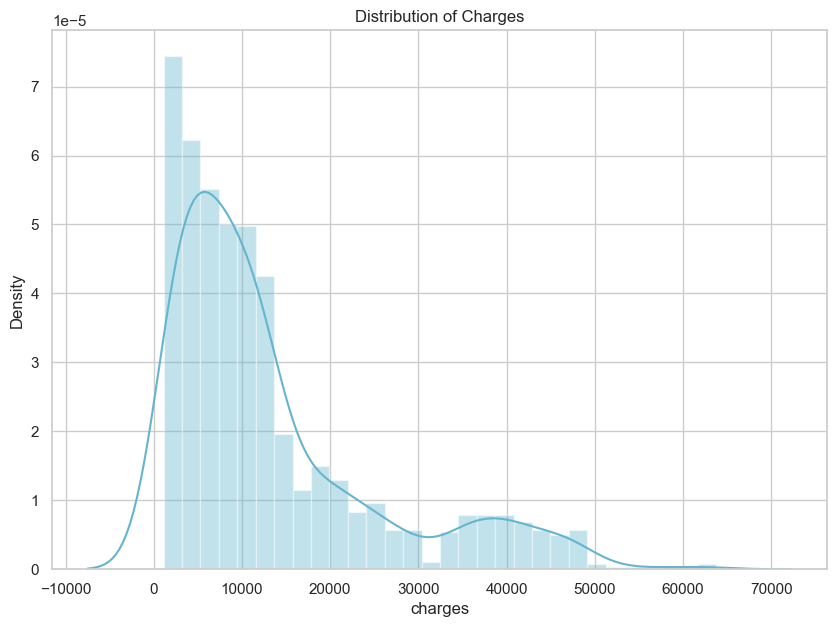

In [11]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(10, 7))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<font size='2' font>Phân phối này bị nghiêng. Để làm cho nó gần hơn với bình thường, chúng ta có thể áp dụng logarit tự nhiên 

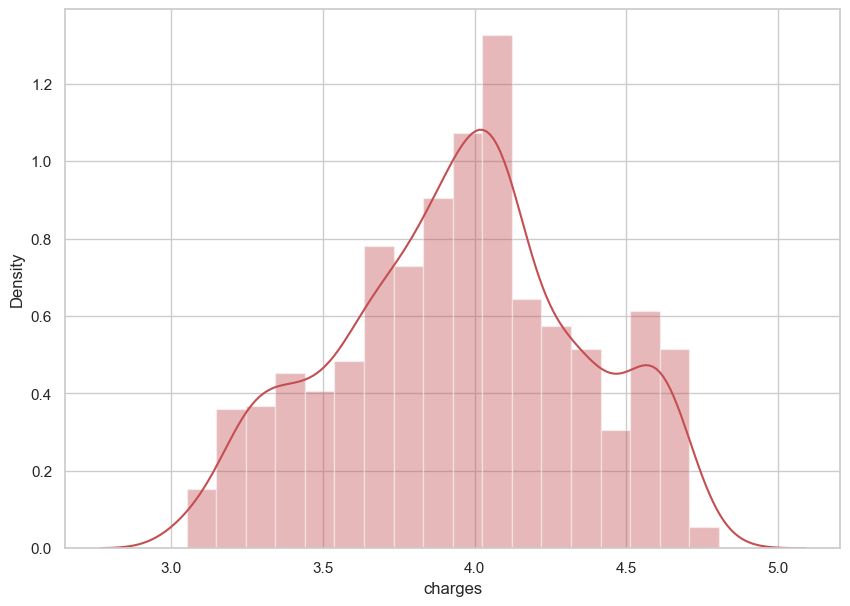

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<font size=2> Hãy xem xét giá qua từng vùng

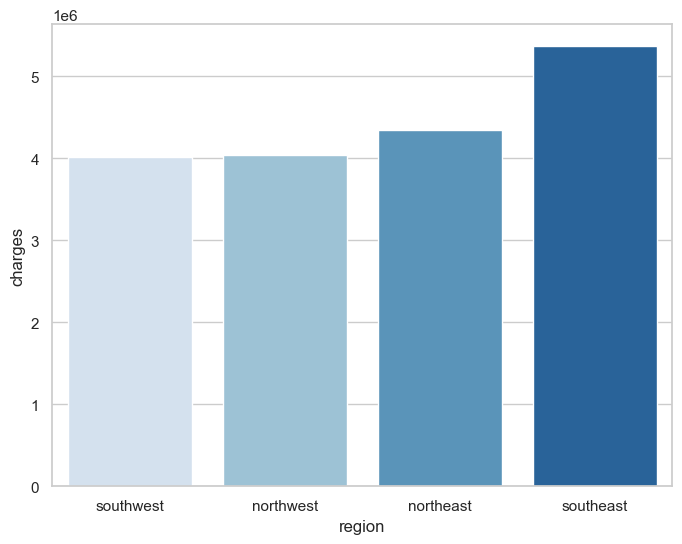

In [13]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), palette='Blues')

<font size='2' font>Như vậy, nhìn chung các khoản phí y tế cao nhất là ở phía đông nam và thấp nhất là ở phía tây nam. Có tính đến một số yếu tố nhất định (giới tính, hút thuốc, có con) Hãy xem nó thay đổi theo khu vực như thế nào 

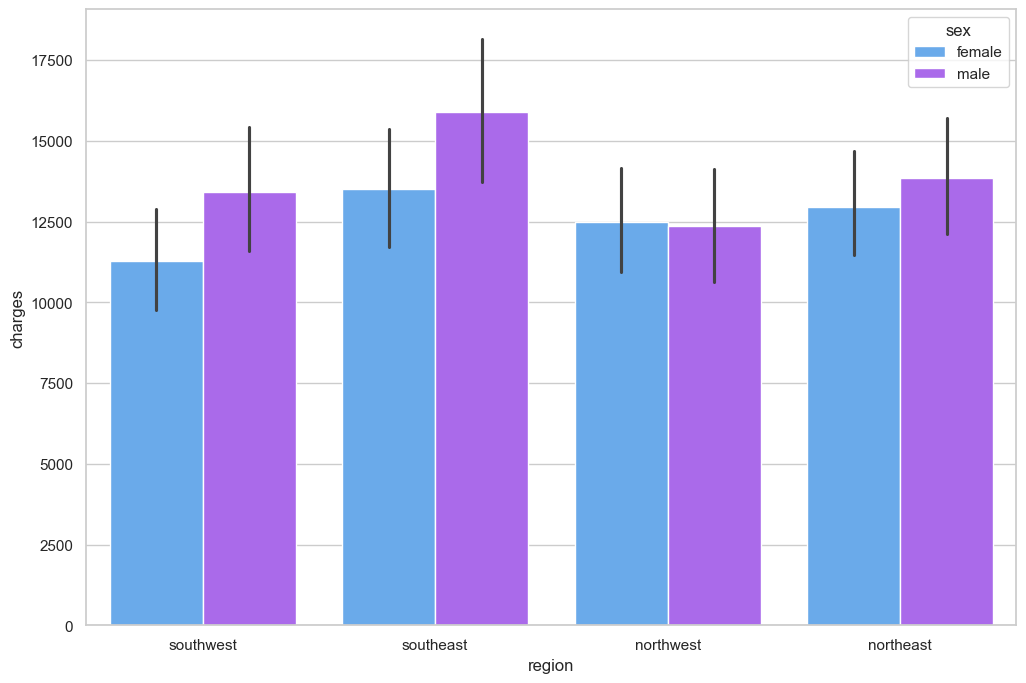

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

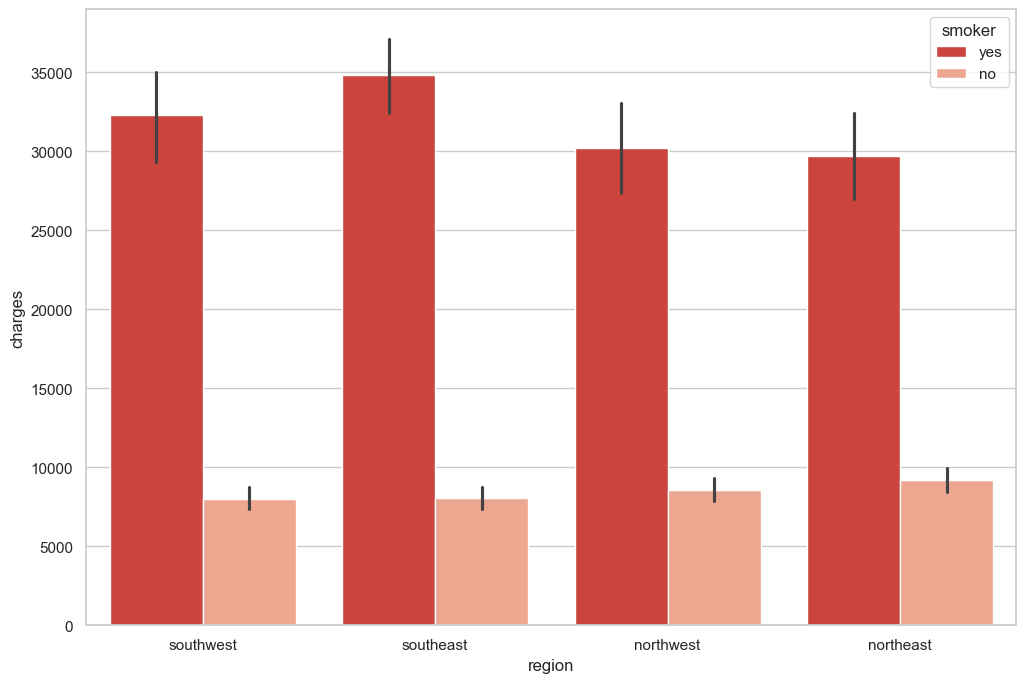

In [15]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

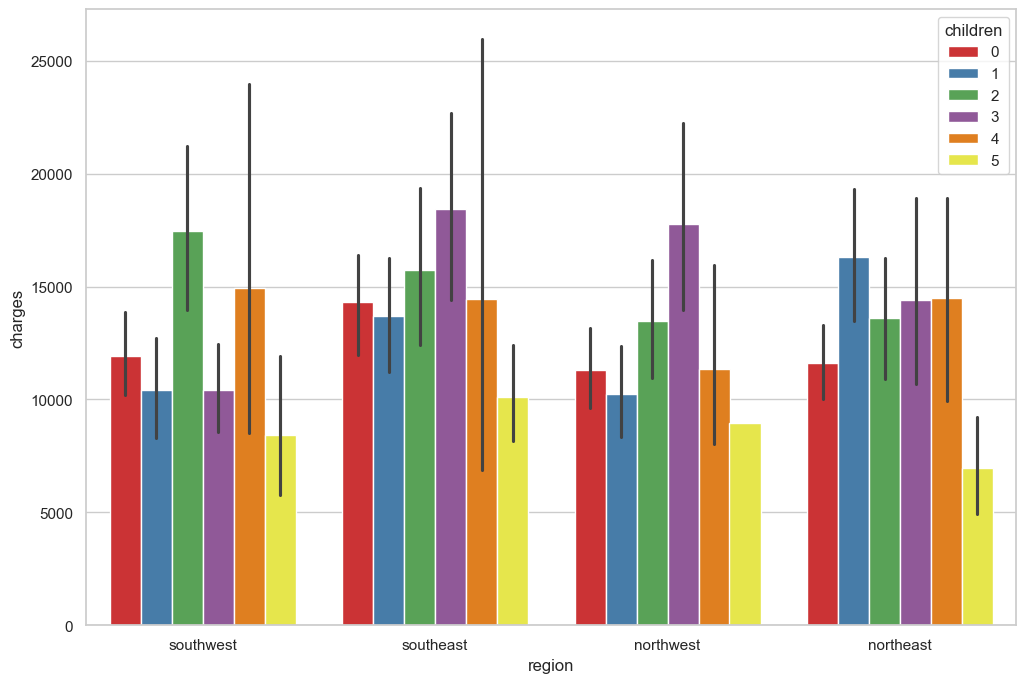

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

<font size='2' font>Như chúng ta có thể thấy từ những con số này, các khoản phí cao nhất do hút thuốc vẫn ở phía đông nam nhưng mức thấp nhất là ở Đông Bắc. Những người ở Tây Nam thường hút thuốc nhiều hơn người ở Đông Bắc, nhưng những người ở Đông Bắc có tính phí cao hơn với giới tính so với Tây Nam và Tây Bắc nói chung. Và những người có trẻ em có xu hướng có chi phí y tế cao hơn so với mặt bằng chung

<font size='2' font>Bây giờ chúng ta hãy phân tích các khoản phí y tế theo yếu tố độ tuổi, BMI, trẻ em, và tình trạng hút thuốc 

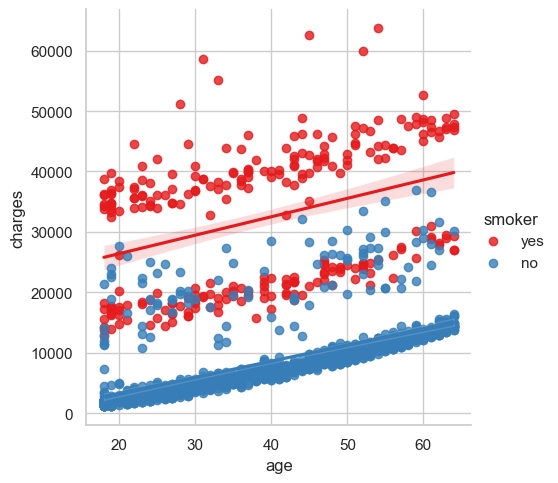

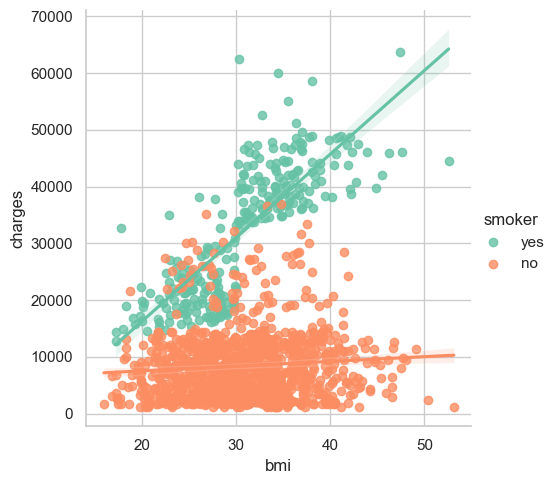

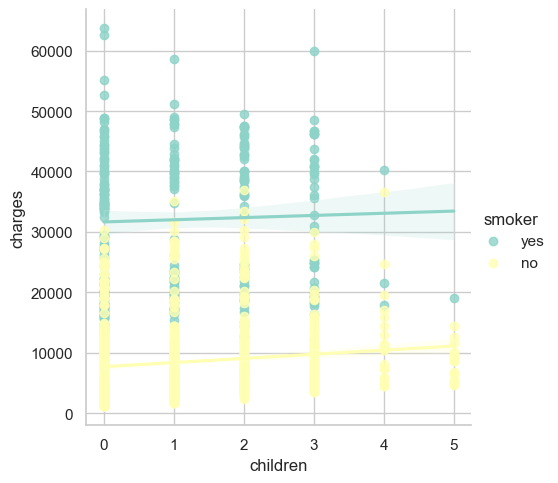

In [17]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<font size='2' font>Hút thuốc có tác động cao nhất đến chi phí y tế, mặc dù chi phí đang tăng theo độ tuổi, BMI và trẻ em. Ngoài ra, những người có con thường hút thuốc ít hơn, mà các biểu đồ violin sau đây cũng cho thấy

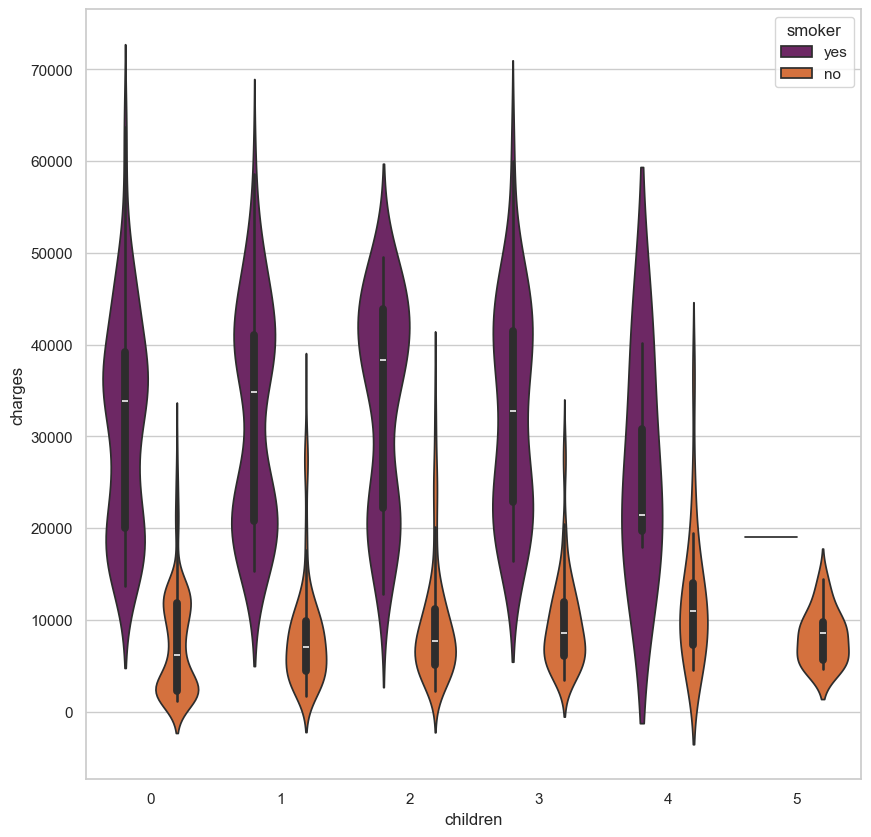

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [19]:
##Chuyển đổi nhãn danh mục thành số bằng cách sử dụng One Hot Encoding
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')
df_obj = pd.get_dummies(df_obj, drop_first=False,dtype=int)
Final_df = pd.concat([df_num, df_obj], axis=1)
df=Final_df
df_obj.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


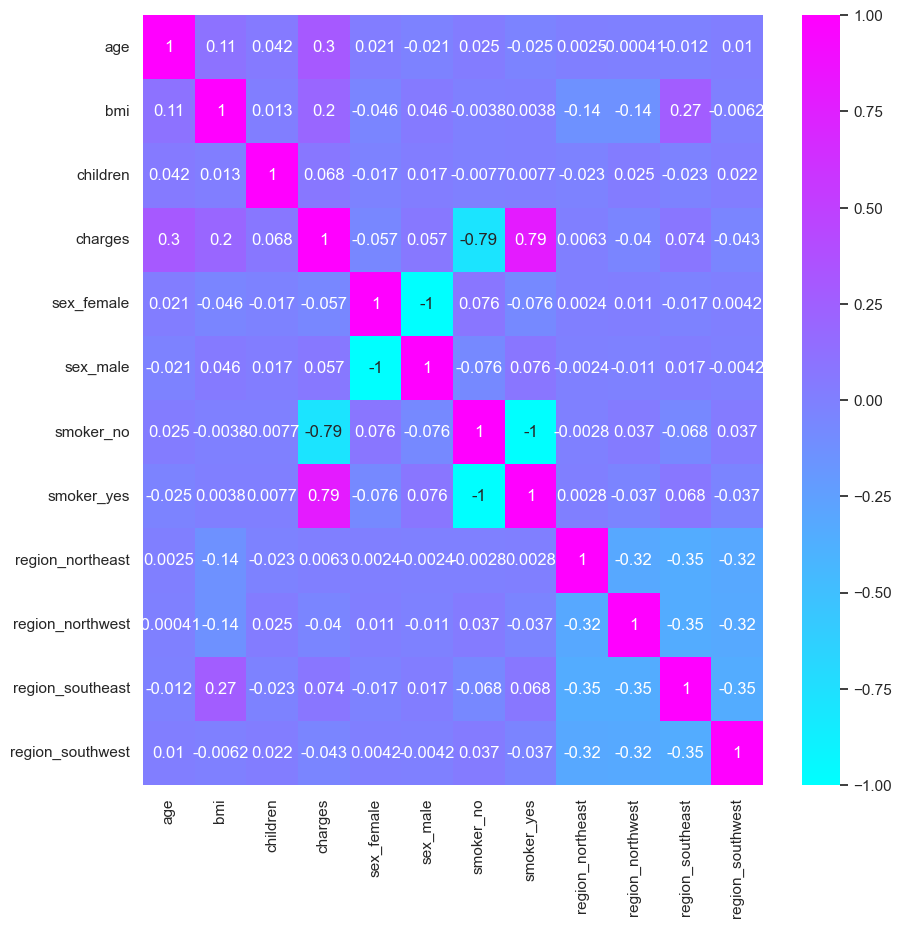

In [20]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>Không có mối tương quan, ngoại trừ việc hút thuốc

In [21]:
df['charges'] = np.log(df['charges'])

<font size=5><p style="color:purple"> Linear Regression

In [22]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=20)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_train, y_train))
print(Lin_reg.score(x_test, y_test))

7.690792038800135
[ 0.03389686  0.01428254  0.1051083   0.03462364 -0.03462364 -0.77845549
  0.77845549  0.07555481  0.02663385 -0.05710759 -0.04508108]
0.7529026795252531
0.8243642852076587


In [23]:
##Dự đoán giá
y_test_pred = Lin_reg.predict(x_test)
##So sánh các giá trị đầu ra thực tế với các giá trị dự đoán
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
698,9.303489,9.284250
520,10.152555,9.108129
1144,9.172680,9.199018
908,9.627080,9.851904
559,7.406364,8.055846
...,...,...
851,9.555321,9.643598
109,10.759084,11.014193
941,9.164251,9.348086
600,7.398201,8.059300


Text(0.5, 1.0, 'Gía thực tế vs Gía dự đoán: $Y_i$ vs $\\hat{Y}_i$')

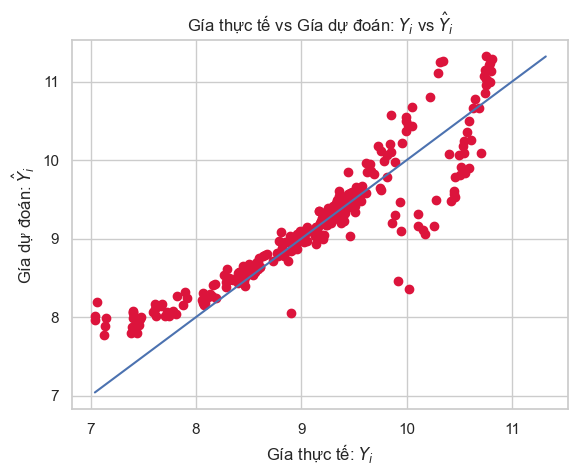

In [24]:
plt.scatter(y_test, y_test_pred, c="crimson")
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel("Gía thực tế: $Y_i$")
plt.ylabel("Gía dự đoán: $\hat{Y}_i$")
plt.title("Gía thực tế vs Gía dự đoán: $Y_i$ vs $\hat{Y}_i$")

In [25]:
##Đánh giá hiệu suất của thuật toán
from sklearn.metrics import mean_squared_error, mean_absolute_error
a=mean_absolute_error(y_test, y_test_pred)
b= mean_squared_error(y_test, y_test_pred)
print(f"Mean absolute error:{a}")
print(f"Mean square error:{b}")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean absolute error:0.2648193220028637
Mean square error:0.1508457981520964
Root Mean Squared Error: 0.3883887204233619


<font size=2> **Conclusion:** like we previously noticed **smoking** is the greatest factor that affects medical cost charges, then it's **bmi** and **age**. **Polynomial Regression** turned out to be the best model